# COUNTER ANALYSIS

First we ASSEMBLE it, after that its been LABELED. Then its PACKAGED and these going into a CARTON. At last the Cartons get PALLETIZED   
It goes from Assembly (Harro Hoefliger) to Labeler (Krones) to Packaging (Schubert Verpacker) to Cartoner (Pester Umverpacker) to Palletizer (Pester)


|IP_TAG Name   |Machine|German|Description|Alarm File location|
|--------------|-------|------|-------------|-------------------| 
|36630901_CNTR_GOOD|Assembly|Montage|pens rejected between Assembly and Labeler|Y:\E00_Solostar\E6_Assembly_Line_6\E63_Montage\CSV|   


In [9]:
import pandas as pd
import numpy as np
import os
from glob import iglob

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# my modules
import set_config
from common_functions import create_df_from_file

In [10]:
# call set_config
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_local = set_config.ConfigSectionMap("SectionOne")['local']

In [12]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

# these are the files we are interested in
# tabIP21Data_36640901_CNTRG.csv             525064
# tabIP21Data_36630901_CNTR_GOOD.csv         397538
# tabIP21Data_36650901_CNTR_OUTPUT2.csv       86768
# tabIP21Data_36630901_CNTRB.csv              26006
# tabIP21Data_36680901_CNTR_GOOD.csv          24526
# tabIP21Data_36680902_CNTR_GOOD.csv          24246
# tabIP21Data_36640901_CNTRB.csv               8425
# tabIP21Data_36650901_CNTR_BAD_FS_F2.csv      4489
# tabIP21Data_36680901_FAULT.csv               3151
# tabIP21Data_36680902_FAULT.csv               2946

# call function with dir, folder, search criteria to find files, name of dataframe to create
df_CNTR = create_df_from_file(dir_sanofi_share, folder, "_CNTR_GOOD.csv")
df_CNTR = df_CNTR.append(create_df_from_file(dir_sanofi_share, folder, "_CNTRG.csv"))
df_CNTR = df_CNTR.append(create_df_from_file(dir_sanofi_share, folder, "_CNTR_OUTPUT2.csv"))
df_CNTR = df_CNTR.append(create_df_from_file(dir_sanofi_share, folder, "_CNTRB.csv"))
df_CNTR = df_CNTR.append(create_df_from_file(dir_sanofi_share, folder, "_CNTR_BAD_FS_F2.csv"))
df_CNTR = df_CNTR.append(create_df_from_file(dir_sanofi_share, folder, "_FAULT.csv"))



In [13]:
df_CNTR.Name.unique()

array(['36630901_CNTR_GOOD', '36670901_CNTR_GOOD', '36680901_CNTR_GOOD',
       '36680902_CNTR_GOOD', '36640901_CNTRG', '36650901_CNTR_OUTPUT2',
       '36630901_CNTRB', '36640901_CNTRB', '36670901_CNTRB',
       '36650901_CNTR_BAD_FS_F2', '36630901_FAULT', '36640901_FAULT',
       '36670901_FAULT', '36680901_FAULT', '36680902_FAULT'], dtype=object)

In [14]:
# convert dates to datetime format
df_CNTR['IP_TREND_TIME'] = pd.to_datetime(df_CNTR['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_CNTR.set_index('IP_TREND_TIME', inplace=True)
df_CNTR.sort_index(inplace=True)

In [29]:
df_CNTR['Machine'] = ''
df_CNTR.loc[df_CNTR['Name'].str.contains('36630901'), 'Machine'] = 'Assembly'
df_CNTR.loc[df_CNTR['Name'].str.contains('36640901'), 'Machine'] = 'Labeler'
df_CNTR.loc[df_CNTR['Name'].str.contains('36650901'), 'Machine'] = 'Packaging'
df_CNTR.loc[df_CNTR['Name'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df_CNTR.loc[df_CNTR['Name'].str.contains('36680902'), 'Machine'] = 'Palletizer'

df_CNTR.loc[df_CNTR['Name'].str.contains('CNTRB'), 'Type'] = 'Bad'
df_CNTR.loc[df_CNTR['Name'].str.contains('BAD'), 'Type'] = 'Bad'
df_CNTR.loc[df_CNTR['Name'].str.contains('FAULT'), 'Type'] = 'Bad'

df_CNTR.sort_values(by = ['Name','IP_TREND_TIME'], inplace=True)
df_CNTR['counter_diff'] = df_CNTR.groupby('Name')['IP_TREND_VALUE'].diff()
# df_CNTR.loc[(df_CNTR.counter_diff < 0) & (df_CNTR.IP_TREND_VALUE == 0), 'counter_diff'] = df_CNTR.groupby('Name')['IP_TREND_VALUE'].diff()
df_CNTR['counter_diff'].loc[df_CNTR.IP_TREND_VALUE < 0] = 0

df_CNTR.reset_index(inplace=True)
df_CNTR.sort_values(['Name','IP_TREND_TIME'], inplace=True)
df_CNTR['time_diff'] = df_CNTR.groupby('Name')['IP_TREND_TIME'].diff().dt.total_seconds()
df_CNTR.set_index('IP_TREND_TIME', inplace=True)
df_CNTR['units_per_sec'] = df_CNTR['counter_diff'] / df_CNTR['time_diff']

C:\Users\mark_\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
# df_CNTR.reset_index(inplace=True)
# df_CNTR.sort_values(['Name','IP_TREND_TIME'], inplace=True)
# df_CNTR.set_index('IP_TREND_TIME', inplace=True)

,IP_TREND_TIME_x,level_0,index_x,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Type,counter_diff,time_diff,units_per_sec,index_y,IP_TREND_TIME_y
0,2021-08-01 00:07:23.300,0,0,36630901_CNTRB,304,Good,Good,Assembly,Bad,NaN,NaN,NaN,0,NaN
1,2021-08-01 00:17:23.100,1,1,36630901_CNTRB,304,Good,Good,Assembly,Bad,0.0,599.8,0.000000,1,599.8
2,2021-08-01 00:27:23.000,2,2,36630901_CNTRB,304,Good,Good,Assembly,Bad,0.0,599.9,0.000000,2,599.9
3,2021-08-01 00:32:46.300,3,3,36630901_CNTRB,305,Good,Good,Assembly,Bad,1.0,323.3,0.003093,3,323.3
4,2021-08-01 00:32:53.400,4,4,36630901_CNTRB,306,Good,Good,Assembly,Bad,1.0,7.1,0.140845,4,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975829,2021-09-30 23:16:59.600,3975829,3975829,36680902_FAULT,0,Good,Good,Palletizer,Bad,0.0,599.1,0.000000,3975829,599.1
3975830,2021-09-30 23:26:59.300,3975830,3975830,36680902_FAULT,0,Good,Good,Palletizer,Bad,0.0,599.7,0.000000,3975830,599.7
3975831,2021-09-30 23:36:58.400,3975831,3975831,36680902_FAULT,0,Good,Good,Palletizer,Bad,0.0,599.1,0.000000,3975831,599.1
3975832,2021-09-30 23:46:58.400,3975832,3975832,36680902_FAULT,0,Good,Good,Palletizer,Bad,0.0,600.0,0.000000,3975832,600.0


In [11]:
df_CNTRB['Machine'] = ''
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36630901'), 'Machine'] = 'Assembly'
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36640901'), 'Machine'] = 'Labeler'
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36650901'), 'Machine'] = 'Packaging'
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36680902'), 'Machine'] = 'Palletizer'


In [12]:
df_CNTRB[df_CNTRB.Machine == 'Assembly'].Name.unique()

array(['36630901_CNTRB', '36630901_CNTRB_PCS', '36630901_CNTRB_PRO',
       '36630901_CNTRB_ST1', '36630901_CNTRB_ST10', '36630901_CNTRB_ST11',
       '36630901_CNTRB_ST12', '36630901_CNTRB_ST13',
       '36630901_CNTRB_ST14', '36630901_CNTRB_ST15',
       '36630901_CNTRB_ST16', '36630901_CNTRB_ST17', '36630901_CNTRB_ST2',
       '36630901_CNTRB_ST3', '36630901_CNTRB_ST4', '36630901_CNTRB_ST5',
       '36630901_CNTRB_ST6', '36630901_CNTRB_ST7', '36630901_CNTRB_ST8',
       '36630901_CNTRB_ST9', '36630901_CNTRB_ZA_PCS',
       '36630901_CNTRB_ZA_PCS1', '36630901_CNTRB_ZA_PCS2',
       '36630901_CNTRB_ZA_PCS3', '36630901_CNTRB_ZA_PCS4',
       '36630901_CNTRB_ZA_PCS5', '36630901_CNTRB_ZA_PCS6',
       '36630901_CNTRB_ZA_PCS7', '36630901_CNTRB_ZA_REL'], dtype=object)

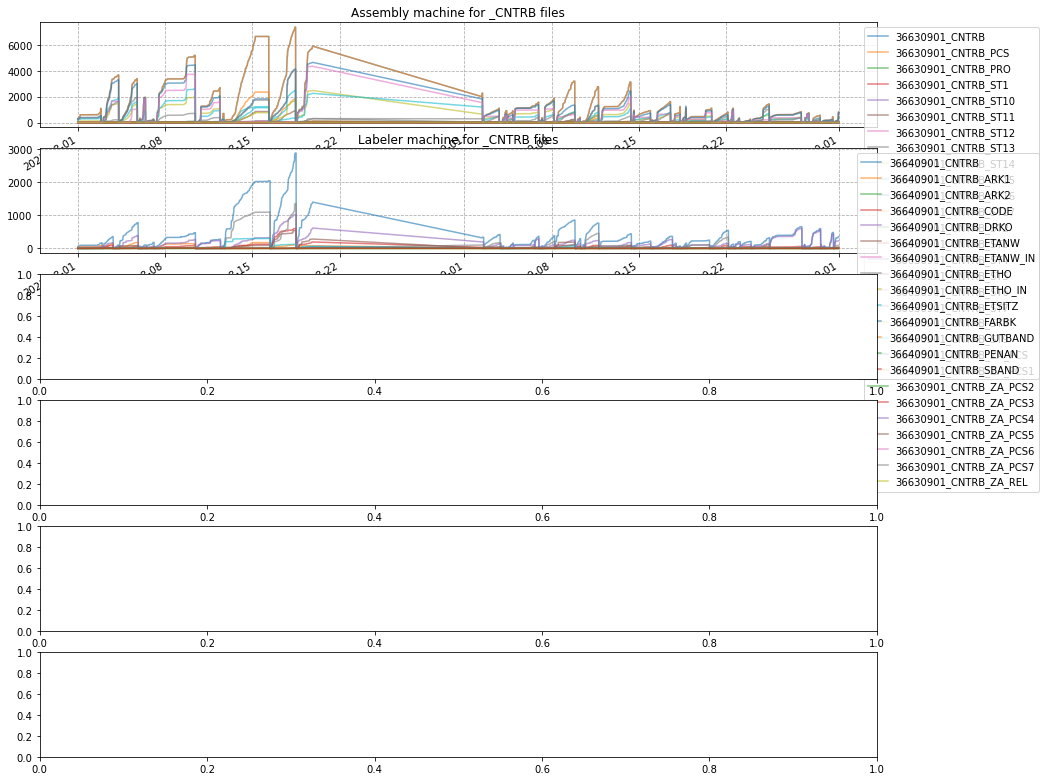

In [13]:
machines = ['Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer']

i=0

fig, axs = plt.subplots(len(machines)+1, 1, figsize=(15, 15))

for x in machines:
    name_filter = '_CNTRB'
    names = df_CNTRB[(df_CNTRB.Name.str.contains(name_filter)) & (df_CNTRB.Machine == x)].Name.unique()
    # only get files with a count
    # names = df_CNTRB['Name'][df_CNTRB.IP_TREND_VALUE > 0].unique()

    for n in names:
        df_CNTRB['IP_TREND_VALUE'][df_CNTRB.Name == n].plot(label=n, ax=axs[i], alpha=0.6)
        # plt.yscale('log')
        axs[i].grid(True,which="both", linestyle='--')
        axs[i].set_title('{} machine for {} files'.format(x, name_filter))
        axs[i].legend(loc='upper right', bbox_to_anchor=(1.20, 1.0), fancybox=True)

    i+=1

In [14]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

df_CNTR = create_df_from_file(dir_sanofi_share, folder, "_CNTR_GOOD")
df_CNTR['IP_TREND_TIME'] = pd.to_datetime(df_CNTR_GOOD['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')


In [15]:
df_CNTR_GOOD['Machine'] = ''
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36630901'), 'Machine'] = 'Assembly'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36640901'), 'Machine'] = 'Labeler'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36650901'), 'Machine'] = 'Packaging'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36680902'), 'Machine'] = 'Palletizer'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36670901'), 'Machine'] = 'Packaging2'


df_CNTR_GOOD

,Name,IP_TREND_TIME,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine
0,36630901_CNTR_GOOD,2021-08-19 20:19:35.500,415611,Good,Good,Assembly
1,36630901_CNTR_GOOD,2021-08-19 20:19:34.500,415601,Good,Good,Assembly
2,36630901_CNTR_GOOD,2021-08-19 20:19:33.500,415595,Good,Good,Assembly
3,36630901_CNTR_GOOD,2021-08-19 20:19:32.500,415585,Good,Good,Assembly
4,36630901_CNTR_GOOD,2021-08-19 20:19:30.400,415579,Good,Good,Assembly
...,...,...,...,...,...,...
45664,36680902_CNTR_GOOD,2021-09-02 09:34:52.700,3544,Good,Good,Palletizer
45665,36680902_CNTR_GOOD,2021-09-02 09:34:33.200,3543,Good,Good,Palletizer
45666,36680902_CNTR_GOOD,2021-09-02 09:34:15.700,3542,Good,Good,Palletizer
45667,36680902_CNTR_GOOD,2021-09-02 09:33:57.300,3541,Good,Good,Palletizer


In [16]:
df_CNTR_GOOD.sort_values(by = ['Name','IP_TREND_TIME'], inplace=True)
df_CNTR_GOOD['counter_diff'] = df_CNTR_GOOD.groupby('Name')['IP_TREND_VALUE'].diff()
df_CNTR_GOOD['counter_diff'].loc[df_CNTR_GOOD.IP_TREND_VALUE < 0] = 0
df_CNTR_GOOD['counter_diff'][(df_CNTR_GOOD.counter_diff < 0) & (df_CNTR_GOOD.IP_TREND_VALUE == 0)] = 0

C:\Users\mark_\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-16-37aace36b71f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CNTR_GOOD['counter_diff'][(df_CNTR_GOOD.counter_diff < 0) & (df_CNTR_GOOD.IP_TREND_VALUE == 0)] = 0


In [41]:
# df_CNTR_GOOD.set_index('IP_TREND_TIME', inplace=True)
temp = df_CNTR_GOOD.loc['2021-09-09'].sort_values(['Name','IP_TREND_TIME'])

df_CNTR_GOOD.loc['2021-09-09'].index


DatetimeIndex(['2021-09-09 00:00:02.900000',        '2021-09-09 00:00:04',
                      '2021-09-09 00:00:06',        '2021-09-09 00:00:07',
               '2021-09-09 00:00:09.100000', '2021-09-09 00:00:10.100000',
               '2021-09-09 00:00:11.200000', '2021-09-09 00:00:12.200000',
               '2021-09-09 00:00:13.200000', '2021-09-09 00:00:14.200000',
               ...
               '2021-09-09 22:47:13.700000', '2021-09-09 22:57:13.100000',
               '2021-09-09 23:07:13.100000', '2021-09-09 23:08:43.800000',
               '2021-09-09 23:11:07.800000', '2021-09-09 23:21:07.600000',
               '2021-09-09 23:31:07.100000', '2021-09-09 23:41:06.400000',
               '2021-09-09 23:51:06.100000', '2021-09-09 23:51:43.200000'],
              dtype='datetime64[ns]', name='IP_TREND_TIME', length=43409, freq=None)

In [595]:
df_CNTR_GOOD.reset_index(inplace=True)
df_CNTR_GOOD.sort_values(['Name','IP_TREND_TIME'], inplace=True)
df_CNTR_GOOD['time_diff'] = df_CNTR_GOOD.groupby('Name')['IP_TREND_TIME'].diff().dt.total_seconds()
df_CNTR_GOOD.set_index('IP_TREND_TIME', inplace=True)

In [596]:
df_CNTR_GOOD['units_per_sec'] = df_CNTR_GOOD['counter_diff'] / df_CNTR_GOOD['time_diff'] 

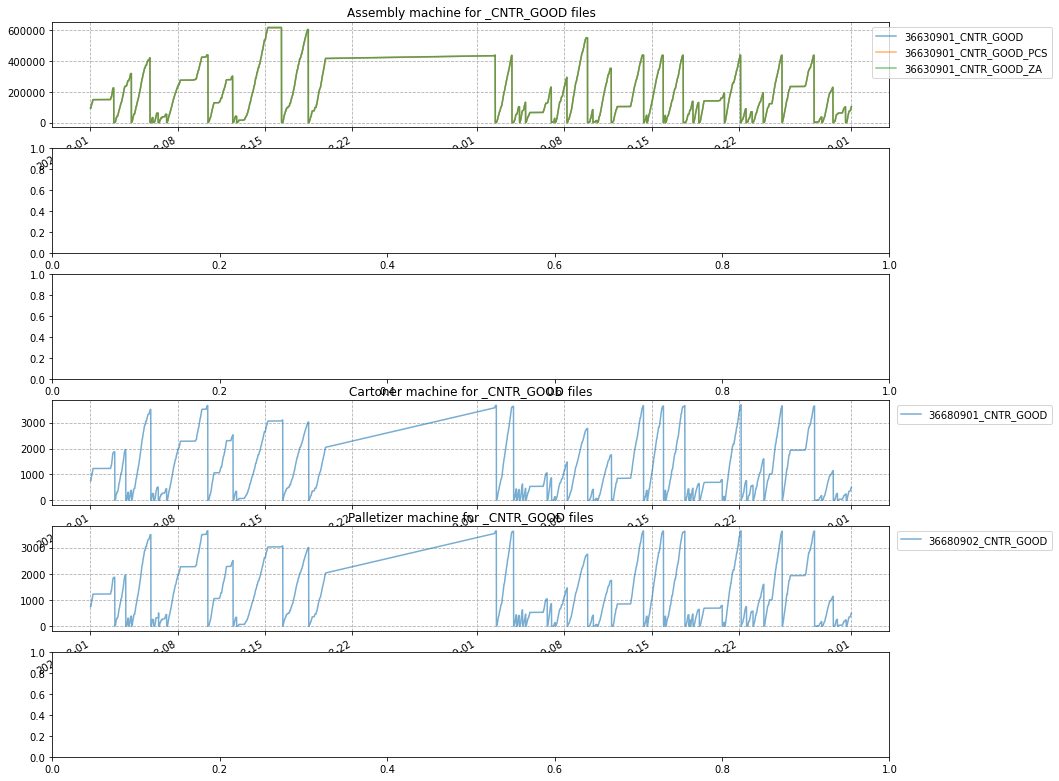

In [597]:
machines = ['Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer']

i=0

fig, axs = plt.subplots(len(machines)+1, 1, figsize=(15, 15))

for x in machines:
    name_filter = '_CNTR_GOOD'
    names = df_CNTR_GOOD[(df_CNTR_GOOD.Name.str.contains(name_filter)) & (df_CNTR_GOOD.Machine == x)].Name.unique()
    # only get files with a count
    # names = df_CNTRB['Name'][df_CNTRB.IP_TREND_VALUE > 0].unique()

    for n in names:
        df_CNTR_GOOD['IP_TREND_VALUE'][df_CNTR_GOOD.Name == n].plot(label=n, ax=axs[i], alpha=0.6)
        # plt.yscale('log')
        axs[i].grid(True,which="both", linestyle='--')
        axs[i].set_title('{} machine for {} files'.format(x, name_filter))
        axs[i].legend(loc='upper right', bbox_to_anchor=(1.20, 1.0), fancybox=True)

    i+=1

In [610]:
# group[group.counter_diff > 20000]
group.loc['2021-08-06 18:00:00':'2021-08-02 20:00:00'].head(75)

,Machine,Name,IP_TREND_TIME,index,IP_TREND_VALUE,counter_diff,time_diff,units_per_sec


In [3]:
freq='D'

df_CNTR_GOOD.sort_values(['Machine','IP_TREND_TIME'], inplace=True)
group = df_CNTR_GOOD.groupby(['Machine','Name',pd.Grouper(freq=freq)]).sum().reset_index()


NameError: name 'df_CNTR_GOOD' is not defined

In [600]:
all = df_CNTR_GOOD.append(df_CNTRB)
group = all.groupby(['Machine','Name',pd.Grouper(freq=freq)]).sum().reset_index()
pivot = group.pivot(index='IP_TREND_TIME', columns='Name', values='counter_diff')

In [601]:
df['Machine'] = ''
df.loc[df['Name_x'].str.contains('36630901'), 'Machine'] = 'Assembly'
df.loc[df['Name_x'].str.contains('36640901'), 'Machine'] = 'Labeler'
df.loc[df['Name_x'].str.contains('36650901'), 'Machine'] = 'Packaging'
df.loc[df['Name_x'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df.loc[df['Name_x'].str.contains('36680902'), 'Machine'] = 'Palletizer'
df.loc[df['Name_x'].str.contains('36670901'), 'Machine'] = 'Packaging2'

KeyError: 'Name_x'

In [2]:
pivot2 = pivot[['36630901_CNTRB','36650901_CNTR_GOOD','36670901_CNTR_GOOD','36680901_CNTR_GOOD','36680902_CNTR_GOOD','36630901_CNTR_GOOD_ZA']]
pivot2['36670901_CNTR_GOOD'] = pivot2['36670901_CNTR_GOOD'].astype(np.int64)
pivot2.head(50)

NameError: name 'pivot' is not defined

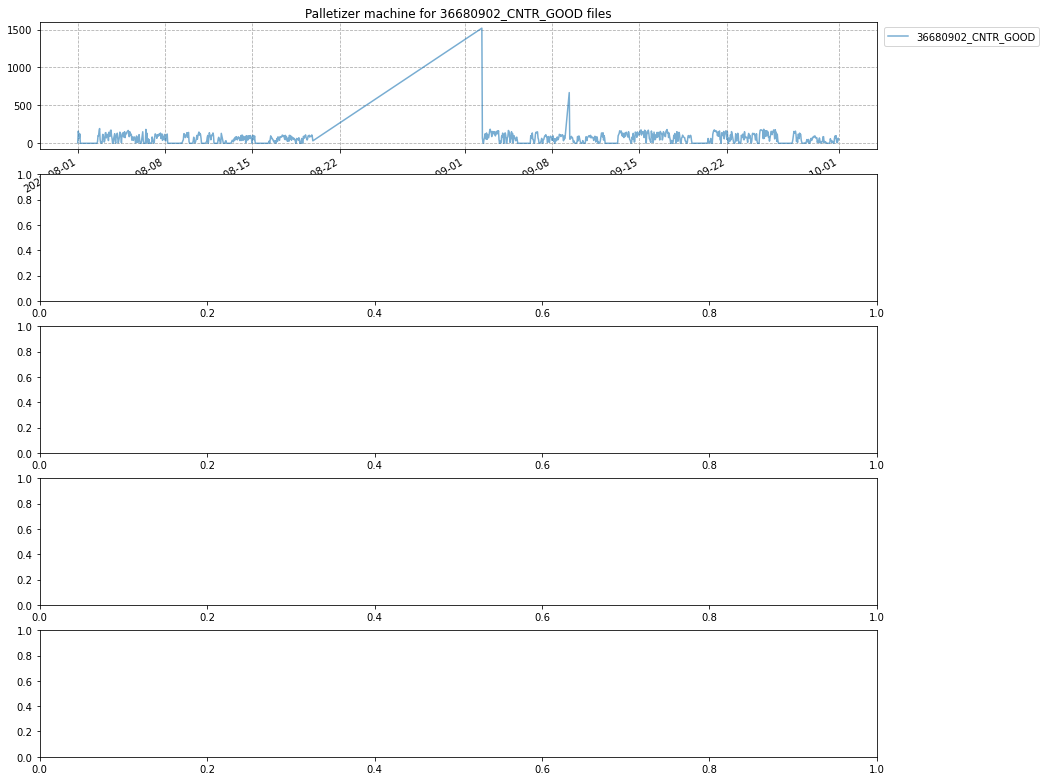

In [573]:
freq='1h'

machines = ['Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer']

fig, axs = plt.subplots(len(machines), 1, figsize=(15, 15))

i=0

for n in names:
    pivot2[n].plot(label=n, ax=axs[i], alpha=0.6)
    # plt.yscale('log')
    axs[i].grid(True,which="both", linestyle='--')
    axs[i].set_title('{} machine for {} files'.format(x, n))
    axs[i].legend(loc='upper right', bbox_to_anchor=(1.20, 1.0), fancybox=True)


    i+=1

In [45]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

# call function with dir, folder, search criteria to find files, name of dataframe to create
# these are the bad pen counts
df_CNTR_OUTPUT = create_df_from_file(dir_sanofi_share, folder, "36650901_CNTR_OUTPUT")
df_CNTR_OUTPUT['IP_TREND_TIME'] = pd.to_datetime(df_CNTR_OUTPUT['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_CNTR_OUTPUT.set_index('IP_TREND_TIME', inplace=True)


In [47]:
df_CNTR_OUTPUT.Name.unique()

array(['36650901_CNTR_OUTPUT1', '36650901_CNTR_OUTPUT2'], dtype=object)

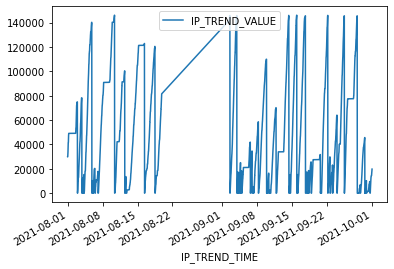

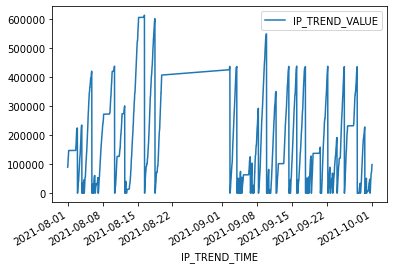

In [48]:
names = df_CNTR_OUTPUT.Name.unique()

for n in names:
    df_CNTR_OUTPUT[df_CNTR_OUTPUT.Name == n].plot()

In [59]:
df_1 = df_CNTR_OUTPUT[df_CNTR_OUTPUT.Name.str.contains('OUTPUT1')]
df_2 = df_CNTR_OUTPUT[df_CNTR_OUTPUT.Name.str.contains('OUTPUT2')]

In [60]:
df_1.rename(columns={'IP_TREND_VALUE':'OUTPUT1'}, inplace=True)
df_2.rename(columns={'IP_TREND_VALUE':'OUTPUT2'}, inplace=True)

C:\Users\mark_\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [63]:
merge = pd.merge(df_1['OUTPUT1'].sort_index(), df_2['OUTPUT2'].sort_index(), left_index=True, right_index=True)

In [81]:
# merge.reset_index(inplace=True)
merge['div'] = round(merge.OUTPUT2 / merge.OUTPUT1,0)

In [82]:
merge.groupby('div').count()

,level_0,index,IP_TREND_TIME,OUTPUT1,OUTPUT2
div,,,,,
3.0,154520,154520,154520,154520,154520
5.0,74172,74172,74172,74172,74172


In [90]:
merge.set_index('IP_TREND_TIME', inplace=True)

In [84]:
print(df_1.shape)
print(df_2.shape)

(230204, 4)
(230200, 4)


<AxesSubplot:xlabel='IP_TREND_TIME'>

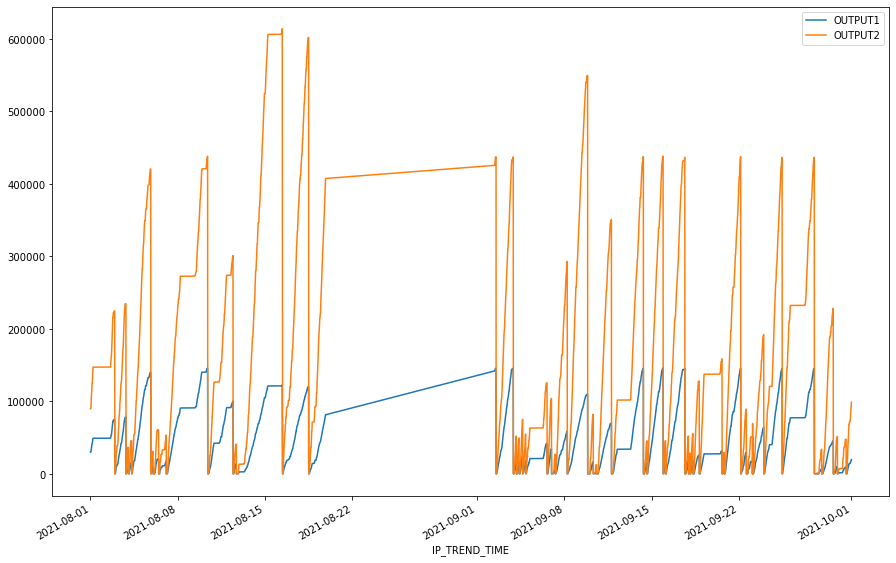

In [92]:
merge[['OUTPUT1','OUTPUT2']].plot(figsize=(15,10))

<AxesSubplot:xlabel='IP_TREND_TIME'>

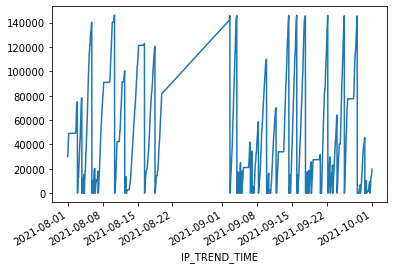

In [93]:
df_1['OUTPUT1'].plot()